In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.simplefilter("ignore", DeprecationWarning)
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns
import joblib
import time
data = load_diabetes()
X, y = data.data, data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Training Data:")
print(X_train)
print("Testing Data:")
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
dt_model = DecisionTreeRegressor(max_depth=10)
dt_model.fit(X_train_scaled, y_train)
y_pred_dt = dt_model.predict(X_test_scaled)
dt_mse = mean_squared_error(y_test, y_pred_dt)
dt_r2 = r2_score(y_test, y_pred_dt)
print("Decision Tree MSE:", dt_mse)
print("Decision Tree R2 Score:", dt_r2)
lin_reg_model = LinearRegression()
lin_reg_model.fit(X_train_scaled, y_train)
y_pred_lin = lin_reg_model.predict(X_test_scaled)
lin_mse = mean_squared_error(y_test, y_pred_lin)
lin_r2 = r2_score(y_test, y_pred_lin)
print("Linear Regression MSE:", lin_mse)
print("Linear Regression R2 Score:", lin_r2)
print("Comparison of Models:")
print(f"Decision Tree MSE: {dt_mse}, R2 Score: {dt_r2}")
print(f"Linear Regression MSE: {lin_mse}, R2 Score: {lin_r2}")


Training Data:
[[ 0.07076875  0.05068012  0.01211685 ...  0.03430886  0.02736771
  -0.0010777 ]
 [-0.00914709  0.05068012 -0.01806189 ...  0.07120998  0.00027149
   0.01963284]
 [ 0.00538306 -0.04464164  0.04984027 ... -0.00259226  0.01703713
  -0.01350402]
 ...
 [ 0.03081083 -0.04464164 -0.02021751 ... -0.03949338 -0.01090444
  -0.0010777 ]
 [-0.01277963 -0.04464164 -0.02345095 ... -0.00259226 -0.03845911
  -0.03835666]
 [-0.09269548 -0.04464164  0.02828403 ... -0.03949338 -0.00514531
  -0.0010777 ]]
Testing Data:
Decision Tree MSE: 4810.009143451884
Decision Tree R2 Score: 0.09213450807659296
Linear Regression MSE: 2900.173287883232
Linear Regression R2 Score: 0.45260660216173787
Comparison of Models:
Decision Tree MSE: 4810.009143451884, R2 Score: 0.09213450807659296
Linear Regression MSE: 2900.173287883232, R2 Score: 0.45260660216173787


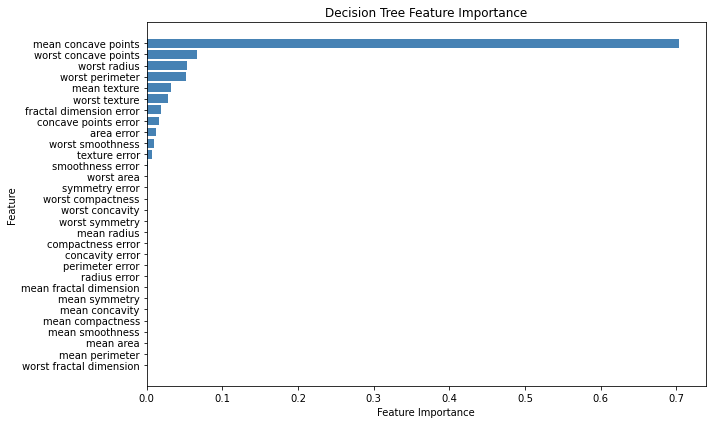

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = DecisionTreeClassifier(random_state=42,max_depth=5)
model.fit(X_train, y_train)
feature_importance = model.feature_importances_
importance_df = pd.DataFrame({"Feature": X.columns, "Importance": feature_importance})
importance_df = importance_df.sort_values(by="Importance", ascending=False)
plt.figure(figsize=(10, 6))
plt.barh(importance_df["Feature"],importance_df["Importance"],color="steelblue")
plt.gca().invert_yaxis()
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.title("Decision Tree Feature Importance")
plt.tight_layout()
